In [1]:
##Download Dataset
"""
https://drive.google.com/drive/folders/1inZ4k6pS62w9B0PjPa7magn9nMBPahAT?usp=sharing
"""

Cloning into 'fashion'...
fatal: repository 'https://github.com/zalandoresearch/fashion-mnist/tree/master/data/fashion/' not found


In [1]:
import numpy as np
import torch
import torch.nn as nn
import torchvision
import torchvision.models as models
import torchvision.transforms as transforms
from PIL import Image
from torch.autograd import Variable
import torchvision.transforms as transforms
from numpy.fft import rfft2, irfft2
from sklearn import svm
import cv2
from matplotlib import pyplot as plt
import joblib
import os
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [4]:
def unpickle(file):
  import pickle
  with open(file, 'rb') as fo:
      dict_ = pickle.load(fo, encoding='bytes')
  return dict_

In [5]:
def load_mnist(path, kind='t10k'):
    import os
    import gzip
    import numpy as np
    labels_path = os.path.join(path,'%s-labels-idx1-ubyte.gz'% kind)
    images_path = os.path.join(path,'%s-images-idx3-ubyte.gz'% kind)
    with gzip.open(labels_path, 'rb') as lbpath: labels = np.frombuffer(lbpath.read(), dtype=np.uint8,offset=8)

    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8,offset=16).reshape(len(labels), 784)

    return images, labels

In [6]:
images, labels = load_mnist('./SIFT/',kind='train')

In [7]:
test_images, test_labels = load_mnist('./SIFT/', kind='t10k')

In [2]:
# Chay VGG16
model_vgg16 = models.vgg16(pretrained=True).to('cuda')
#model_vgg16.eval()

In [3]:
model_vgg16.classifier = model_vgg16.classifier[0:len(model_vgg16.classifier)-1]
model_vgg16.eval()

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [11]:
# Chay AlexNet
model_alexnet = models.alexnet(pretrained=True).to('cuda')
#model_alexnet.eval()

In [12]:
model_alexnet.classifier = model_alexnet.classifier[0:len(model_alexnet.classifier)-1]
model_alexnet.eval()


AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [4]:
preprocess_vgg = transforms.Compose([
    transforms.Scale(256),
    transforms.CenterCrop(224),
    transforms.ToTensor()
])

D:\anaconda\envs\snowflakes\lib\site-packages\torchvision\transforms\transforms.py:317: UserWarning: The use of the transforms.Scale transform is deprecated, please use transforms.Resize instead.
  warnings.warn("The use of the transforms.Scale transform is deprecated, " +


In [2]:
preprocess_alex = transforms.Compose([
    
    #transforms.ToPILImage(),
    transforms.Scale(256),
    transforms.CenterCrop(227),
    transforms.ToTensor()
])

D:\anaconda\envs\snowflakes\lib\site-packages\torchvision\transforms\transforms.py:317: UserWarning: The use of the transforms.Scale transform is deprecated, please use transforms.Resize instead.
  warnings.warn("The use of the transforms.Scale transform is deprecated, " +


In [19]:
##### Xử lý ảnh 1D -> 3D tập Test

data_test = []
tags_test = []
i = 0
for img, label in zip(test_images, test_labels):
    img_ = np.reshape(img, (28,28))
    img_pil_ = Image.fromarray(img_)
    img_pil = Image.merge("RGB",(img_pil_, img_pil_, img_pil_))
    img_pil.save(f'./test_fashion/test{i}.jpg')
    data_test.append(f'test{i}.jpg')
    tags_test.append(label)
    i+=1



In [16]:
######## tập test
test_features_vgg=[]
test_features_alexnet=[]
dir=""
i=0
for img in data_test:
    if i % 1000 == 0:
      print(i/10000*100)
    ###########
    torch.cuda.empty_cache()
    img_pil = Image.open('./test_fashion/' + img)
    img_tensor_alexnet, img_tensor_vgg = preprocess_alex(img_pil), preprocess_vgg(img_pil)
    img_tensor_alexnet.unsqueeze_(0)
    img_tensor_vgg.unsqueeze_(0)
    img_var_alexnet, img_var_vgg = Variable(img_tensor_alexnet.to('cuda')), Variable(img_tensor_vgg.to('cuda'))
    ## Trich Xuat Dat Trung ##
    out_vgg = model_vgg16(img_var_vgg)
    out_alexnet = model_alexnet(img_var_alexnet)
    newOut_vgg = np.squeeze(out_vgg.data.to('cpu'))
    newOut_alexnet = np.squeeze(out_alexnet.data.to('cpu'))
    ###########
    test_features_vgg.append(newOut_vgg)
    test_features_alexnet.append(newOut_alexnet)
    i+=1

0.0
10.0
20.0
30.0
40.0
50.0
60.0
70.0
80.0
90.0


In [20]:
##### Xử lý ảnh 1D -> 3D tập Train

data_train = []
tags = []
i = 0
for img, label in zip(images, labels):
    #img_ = np.reshape(img, (28,28))
    #img_pil_ = Image.fromarray(img_)
    #img_pil = Image.merge("RGB",(img_pil_, img_pil_, img_pil_))
    #img_pil.save(f'./train_fashion/test{i}.jpg')
    data_train.append(f'test{i}.jpg')
    tags.append(label)
    i+=1


In [23]:
######## Tập train
features_vgg=[]
features_alexnet=[]
i=0
for img in data_train:
    if i % 1000 == 0:
      print(i/60000*100)
    #########
    torch.cuda.empty_cache()
    img_pil = Image.open('./train_fashion/' + img)
    img_tensor_alexnet, img_tensor_vgg = preprocess_alex(img_pil), preprocess_vgg(img_pil)
    img_tensor_alexnet.unsqueeze_(0)
    img_tensor_vgg.unsqueeze_(0)
    img_var_alexnet, img_var_vgg = Variable(img_tensor_alexnet.to('cuda')), Variable(img_tensor_vgg.to('cuda'))
    ## Trich Xuat Dat Trung ##
    out_vgg = model_vgg16(img_var_vgg)
    out_alexnet = model_alexnet(img_var_alexnet)
    newOut_vgg = np.squeeze(out_vgg.data.to('cpu'))
    newOut_alexnet = np.squeeze(out_alexnet.data.to('cpu'))
    ##
    features_vgg.append(newOut_vgg)
    features_alexnet.append(newOut_alexnet)
    i+=1

0.0
1.6666666666666667
3.3333333333333335
5.0
6.666666666666667
8.333333333333332
10.0
11.666666666666666
13.333333333333334
15.0
16.666666666666664
18.333333333333332
20.0
21.666666666666668
23.333333333333332
25.0
26.666666666666668
28.333333333333332
30.0
31.666666666666664
33.33333333333333
35.0
36.666666666666664
38.333333333333336
40.0
41.66666666666667
43.333333333333336
45.0
46.666666666666664
48.333333333333336
50.0
51.66666666666667
53.333333333333336
55.00000000000001
56.666666666666664
58.333333333333336
60.0
61.66666666666667
63.33333333333333
65.0
66.66666666666666
68.33333333333333
70.0
71.66666666666667
73.33333333333333
75.0
76.66666666666667
78.33333333333333
80.0
81.66666666666667
83.33333333333334
85.0
86.66666666666667
88.33333333333333
90.0
91.66666666666666
93.33333333333333
95.0
96.66666666666667
98.33333333333333


In [24]:
# Thay cac so thu tu trong label bang ten label
sample = ['T-shirt/top' , 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 	'Ankle boot']
tags = [sample[i] for i in tags]
tags_test = [sample[i] for i in tags_test]
#tags = [sample.index(i) for i in tags]
tags[0]

'Ankle boot'

In [26]:
##### tu tensor dua ve numpy float cho tập test
test_vgg = [np.array(i,dtype=float) for i in test_features_vgg]
test_alex =[np.array(i,dtype=float) for i in test_features_alexnet]

In [ ]:
######### tensor ko sd được trong fit nên đưa về numpy array
##### cho tập train
train_vgg = [np.array(i,dtype=float) for i in features_vgg]
train_alex =[np.array(i,dtype=float) for i in features_alexnet]
# print(type(train_alex[-1]))
# for i in train_vgg[0]: print(i)

In [28]:
x_train_vgg, x_test_vgg, Y_train_vgg, Y_test_vgg = train_test_split(train_vgg, tags, test_size = 0.2, random_state = 19520197)
x_train_alexnet, x_test_alexnet, Y_train_alexnet, Y_test_alexnet = train_test_split(train_alex, tags, test_size = 0.2, random_state = 19521281)

In [29]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    import itertools
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    name_model = ''
    if 'ALEXNET' in title:
        if 'LinearSVC' in title:
            name_model = 'AlexNet_LinearSVC'
        else:
            name_model = 'AlexNet_SVC'
    else:
        if 'LinearSVC' in title:
            name_model = 'vgg_LinearSVC'
        else:
            name_model = 'vgg_SVC'
    plt.savefig(f'./{name_model}.png', dpi=300, bbox_inches='tight')

---MODEL ALEXNET---
Train score:  0.9713125
Test score:  0.87225
Confusion matrix, without normalization
[[1024    0   35   52   13    1  140    0   10    0]
 [   2 1161    1   22    3    0    4    0    0    0]
 [  16    2  961   19  128    0   85    0   10    0]
 [  24   14    5 1053   43    0   32    0    3    0]
 [   1    2   82   38  964    0   68    0    4    0]
 [   0    0    0    2    0 1163    0   35    1   22]
 [ 140    1  106   39  117    0  756    0   11    0]
 [   0    0    0    0    0   56    0 1099    0   48]
 [   3    0    2    4    5    4    8    2 1177    1]
 [   0    0    0    0    0   15    1   50    1 1109]]
              precision    recall  f1-score   support

 T-shirt/top       0.94      0.94      0.94      1176
     Trouser       0.97      0.98      0.97      1206
    Pullover       0.76      0.83      0.79      1159
       Dress       0.86      0.90      0.88      1174
        Coat       0.81      0.79      0.80      1221
      Sandal       0.94      0.95      

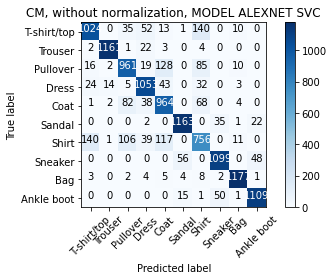

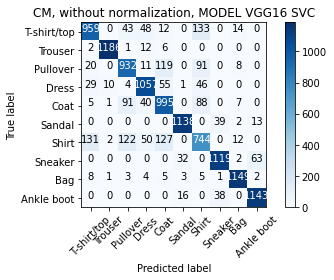

In [30]:
train = [[x_train_alexnet, Y_train_alexnet], [x_train_vgg, Y_train_vgg]]
test = [[x_test_alexnet, Y_test_alexnet], [x_test_vgg, Y_test_vgg]]
#kernel_ = input("Choose one of 4 names of kernel: linear, kbf, sigmoid, poly\n")
model_ = ['ALEXNET', 'VGG16']
for _ in range(2):
    clf = svm.SVC(kernel='linear')
    clf.fit(train[_][0], train[_][1])
    print("---MODEL ALEXNET---" if _ == 0 else "---MODEL VGG16---")
    print("Train score: ", clf.score(train[_][0], train[_][1]))
    print("Test score: ",clf.score(test[_][0],test[_][1]))
    y_pred=clf.predict(test[_][0])
    cnf_matrix_nb = confusion_matrix(test[_][1], y_pred, labels=sample)
    np.set_printoptions(precision=2)
    plt.figure()
    plot_confusion_matrix(cnf_matrix_nb, classes=sample,
                      title=f'CM, without normalization, MODEL {model_[_]} SVC')
    print(classification_report(test[_][1], y_pred,target_names=sample))

In [32]:
x = '---MODEL VGG16---\nTrain score:  0.982375\nTest score:  0.8685\nConfusion matrix, without normalization\n[[ 959    0   43   48   12    0  133    0   14    0]\n [   2 1186    1   12    6    0    0    0    0    0]\n [  20    0  932   11  119    0   91    0    8    0]\n [  29   10    4 1057   55    1   46    0    0    0]\n [   5    1   91   40  995    0   88    0    7    0]\n [   0    0    0    0    0 1138    0   39    2   13]\n [ 131    2  122   50  127    0  744    0   12    0]\n [   0    0    0    0    0   32    0 1119    2   63]\n [   8    1    3    4    5    3    5    1 1149    2]\n [   0    0    0    0    0   16    0   38    0 1143]]\n              precision    recall  f1-score   support\n\n T-shirt/top       0.94      0.95      0.95      1197\n     Trouser       0.96      0.97      0.97      1181\n    Pullover       0.75      0.81      0.78      1227\n       Dress       0.86      0.88      0.87      1202\n        Coat       0.78      0.79      0.78      1181\n      Sandal       0.96      0.95      0.96      1192\n       Shirt       0.67      0.63      0.65      1188\n     Sneaker       0.93      0.92      0.93      1216\n         Bag       0.83      0.79      0.81      1209\n  Ankle boot       0.99      0.98      0.99      1207\n\n    accuracy                           0.87     12000\n   macro avg       0.87      0.87      0.87     12000\nweighted avg       0.87      0.87      0.87     12000\n\n'

In [33]:
print(x)

---MODEL VGG16---
Train score:  0.982375
Test score:  0.8685
Confusion matrix, without normalization
[[ 959    0   43   48   12    0  133    0   14    0]
 [   2 1186    1   12    6    0    0    0    0    0]
 [  20    0  932   11  119    0   91    0    8    0]
 [  29   10    4 1057   55    1   46    0    0    0]
 [   5    1   91   40  995    0   88    0    7    0]
 [   0    0    0    0    0 1138    0   39    2   13]
 [ 131    2  122   50  127    0  744    0   12    0]
 [   0    0    0    0    0   32    0 1119    2   63]
 [   8    1    3    4    5    3    5    1 1149    2]
 [   0    0    0    0    0   16    0   38    0 1143]]
              precision    recall  f1-score   support

 T-shirt/top       0.94      0.95      0.95      1197
     Trouser       0.96      0.97      0.97      1181
    Pullover       0.75      0.81      0.78      1227
       Dress       0.86      0.88      0.87      1202
        Coat       0.78      0.79      0.78      1181
      Sandal       0.96      0.95      0.96

D:\anaconda\envs\snowflakes\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


---MODEL ALEXNET---
Train score:  0.918
Test score:  0.8572
Confusion matrix, without normalization
[[791   1  58  59  22   1  59   1   8   0]
 [  2 970   2  16   3   1   4   0   0   2]
 [ 10   1 878  17  67   0  26   0   1   0]
 [ 14   5  28 892  39   0  21   0   0   1]
 [  3   1 136  36 787   0  35   0   2   0]
 [  1   0   0   3   0 941   1  42   1  11]
 [138   3 196  68 118   0 465   0  12   0]
 [  0   0   0   1   0  11   0 971   0  17]
 [  4   1   8   6   9   2   6   2 959   3]
 [  0   0   1   0   0  14   0  67   0 918]]
              precision    recall  f1-score   support

 T-shirt/top       0.96      0.92      0.94      1000
     Trouser       0.98      0.96      0.97      1000
    Pullover       0.75      0.79      0.77      1000
       Dress       0.81      0.89      0.85      1000
        Coat       0.67      0.88      0.76      1000
      Sandal       0.97      0.94      0.96      1000
       Shirt       0.75      0.47      0.58      1000
     Sneaker       0.90      0.97   

D:\anaconda\envs\snowflakes\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


---MODEL VGG16---
Train score:  0.942
Test score:  0.8587
Confusion matrix, without normalization
[[746   3  54  38  19   1 123   0  15   1]
 [  1 973   2  16   5   0   1   0   2   0]
 [  7   1 874   8  64   0  44   0   2   0]
 [ 23  11  34 832  54   2  37   0   6   1]
 [  1   3 128  26 807   0  31   0   4   0]
 [  0   0   1   0   1 956   0  31   1  10]
 [ 95   6 170  45 119   1 551   0  12   1]
 [  0   0   0   0   0  34   0 925   1  40]
 [  2   1   9   3   5   3   6   0 969   2]
 [  0   0   0   0   1   8   0  37   0 954]]
              precision    recall  f1-score   support

 T-shirt/top       0.95      0.95      0.95      1000
     Trouser       0.96      0.97      0.96      1000
    Pullover       0.75      0.81      0.78      1000
       Dress       0.86      0.83      0.85      1000
        Coat       0.69      0.87      0.77      1000
      Sandal       0.95      0.96      0.95      1000
       Shirt       0.69      0.55      0.61      1000
     Sneaker       0.93      0.93     

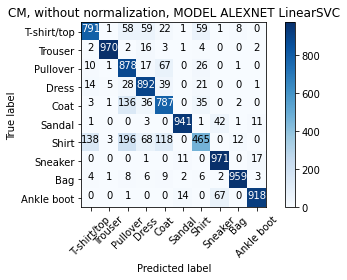

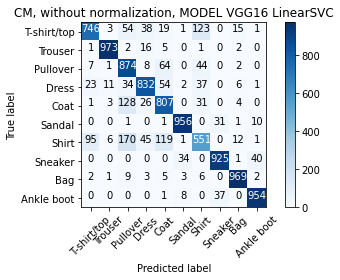

In [31]:
# Sử dụng LinearSVM 
train = [[train_alex, tags], [train_vgg, tags]]
test = [[test_alex, tags_test], [test_vgg, tags_test]]
#kernel_ = input("Choose one of 4 names of kernel: linear, kbf, sigmoid, poly\n")
model_ = ['ALEXNET', 'VGG16']
for _ in range(2):
    clf = svm.LinearSVC()
    clf.fit(train[_][0], train[_][1])
    print("---MODEL ALEXNET---" if _ == 0 else "---MODEL VGG16---")
    print("Train score: ", clf.score(train[_][0], train[_][1]))
    print("Test score: ",clf.score(test[_][0],test[_][1]))
    y_pred=clf.predict(test[_][0])
    cnf_matrix_nb = confusion_matrix(test[_][1], y_pred, labels=sample)
    np.set_printoptions(precision=2)
    plt.figure()
    plot_confusion_matrix(cnf_matrix_nb, classes=sample,
                      title=f'CM, without normalization, MODEL {model_[_]} LinearSVC')
    print(classification_report(test[_][1], y_pred,target_names=sample))

In [ ]:
joblib.dump(clf, 'SVM1.pkl')

In [5]:
clf = joblib.load('SVM1.pkl')

In [6]:
def showImage(image):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(image)
    plt.show()

In [7]:
test_file=[file for file in os.listdir(path="test")]
test_file

['240696725-99-perla-tweed-dress.jpg',
 'grey-phoebe-ankle-boots-lotus-p12804-29471_image.jpg',
 'OIP (1).jpg',
 'OIP (2).jpg',
 'OIP (3).jpg',
 'OIP.jpg',
 'R (1).jpg',
 'R.jpg',
 'R.png']

In [8]:
def ShowResult(img_name):
  img=cv2.imread(img_name)
  #img_pil = Image.open(requests.get(url, stream=True).raw)
  img_pil = Image.open(img_name)

  # img_pil = Image.open('/Users/sahilmishra/Desktop/Pictures/Dataset/image178.jpg')
  img_tensor = preprocess_vgg(img_pil)
  img_tensor.unsqueeze_(0)
  img_var = Variable(img_tensor.to('cuda'))
  out = model_vgg16(img_var)
  #print(type(out))
  #print(out)
  newOut = np.squeeze(out.data.to('cpu'))
  pred = clf.predict([np.array(newOut, dtype=float)])

  print(pred)
  showImage(img)

['Dress']


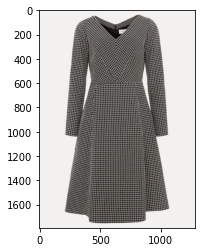

['Sneaker']


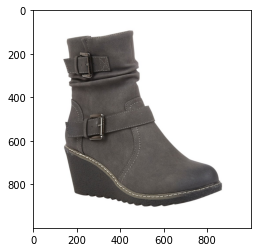

['T-shirt/top']


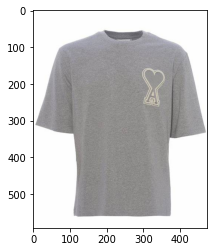

['Sneaker']


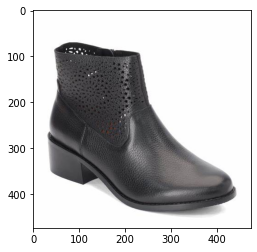

['Sandal']


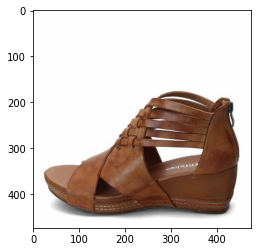

['Trouser']


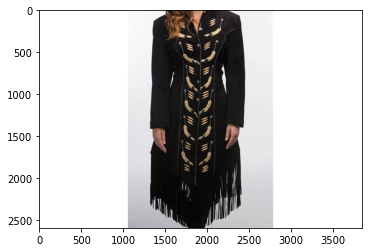

['T-shirt/top']


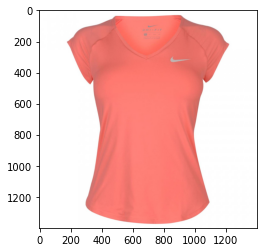

['Dress']


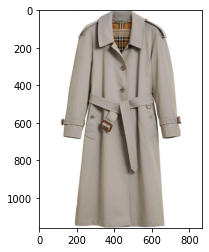

RuntimeError: Given groups=1, weight of size [64, 3, 3, 3], expected input[1, 1, 224, 224] to have 3 channels, but got 1 channels instead

In [9]:
for  img_name in test_file:
  ShowResult("test" + "/" +img_name)